<a href="https://colab.research.google.com/github/brijeshksingh/AIML_Colab_repo/blob/main/Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/content/sample_data/wine_data.csv', header=None, usecols=[0,1,2])
df.columns = ['Class label', 'Alcohol', 'Malic acid']
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

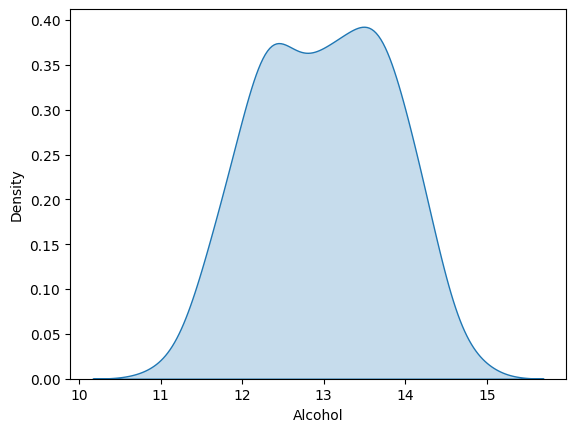

In [5]:
sns.kdeplot(df['Alcohol'], fill=True)
#plt.show()

<Axes: xlabel='Malic acid', ylabel='Density'>

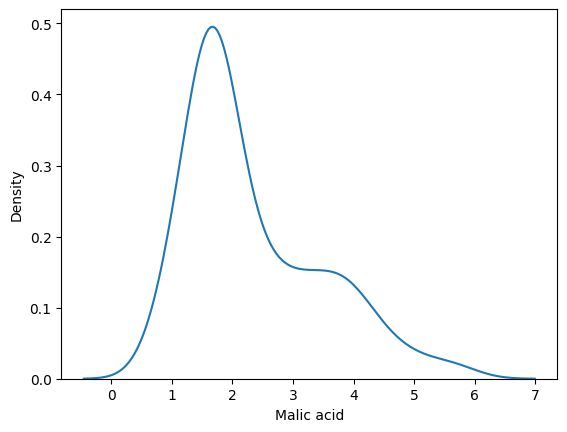

In [6]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

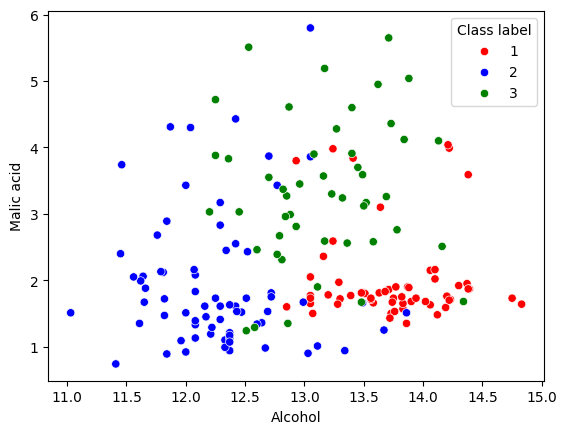

In [10]:
color_dict={1:'red',3:'green',2:'blue'}

sns.scatterplot(x='Alcohol', y='Malic acid', hue='Class label', data=df, palette=color_dict)

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('Class label', axis=1), df['Class label'], test_size=0.3, random_state=0)
x_train.shape, y_test.shape

((124, 2), (54,))

In [23]:
x_train, x_test

(     Alcohol  Malic acid
 22     13.71        1.86
 108    12.22        1.29
 175    13.27        4.28
 145    13.16        3.57
 71     13.86        1.51
 ..       ...         ...
 103    11.82        1.72
 67     12.37        1.17
 117    12.42        1.61
 47     13.90        1.68
 172    14.16        2.51
 
 [124 rows x 2 columns],
      Alcohol  Malic acid
 54     13.74        1.67
 151    12.79        2.67
 63     12.37        1.13
 55     13.56        1.73
 123    13.05        5.80
 121    11.56        2.05
 7      14.06        2.15
 160    12.36        3.83
 106    12.25        1.73
 90     12.08        1.83
 141    13.36        2.56
 146    13.88        5.04
 5      14.20        1.76
 98     12.37        1.07
 168    13.58        2.58
 80     12.00        0.92
 33     13.76        1.53
 18     14.19        1.59
 61     12.64        1.36
 51     13.83        1.65
 66     13.11        1.01
 37     13.05        1.65
 4      13.24        2.59
 104    12.51        1.73
 60     12.

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [27]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [31]:
np.round(x_train.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [32]:
np.round(x_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


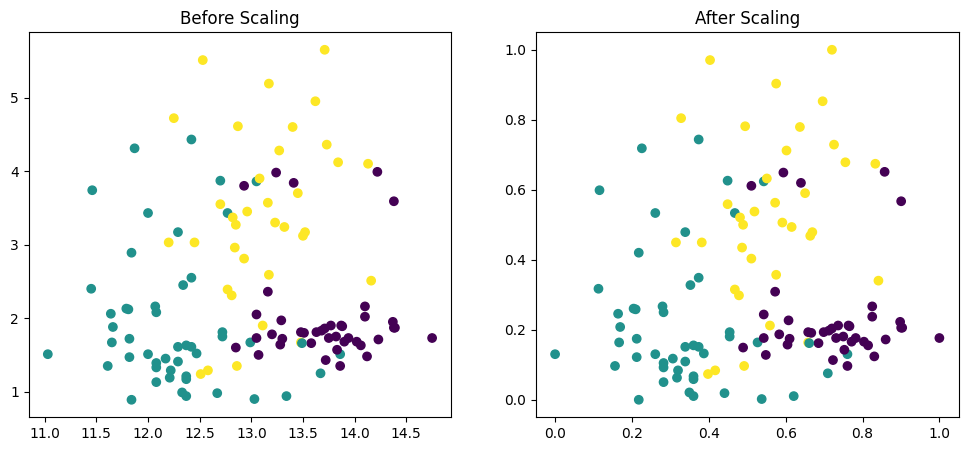

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(x_train['Alcohol'], x_train['Malic acid'], c=y_train)
ax1.set_title('Before Scaling')
ax2.scatter(x_train_scaled['Alcohol'], x_train_scaled['Malic acid'], c=y_train)
ax2.set_title('After Scaling')
plt.show()

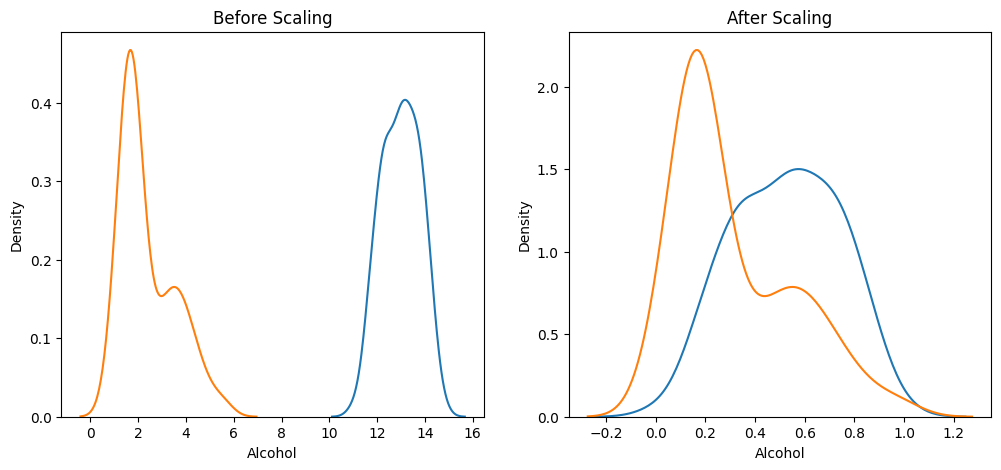

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Alcohol'], ax=ax1)
sns.kdeplot(x_train['Malic acid'], ax=ax1)
ax2.set_title('After Scaling')
sns.kdeplot(x_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(x_train_scaled['Malic acid'], ax=ax2)
plt.show()